# Covolutional neural networks for image processing

**Goal**: predict the image class - nondemented, very mild demented, mild demented, moderate demented

## Estimating the image convolution path 

Input image size - 176 x 208 black and white

Two steps of processing: 

Convolution 1  
* Would use stride of 2 (should be enough to recognize the shape)
* No padding - not expected to have relevant information in the frame of imgae
* Will start with 5 filters/kernels 
* Will use a kernel of dimension 6*6

-- pixel size reduced from 176x208 to 43x51

Convolution 2 
* Would use stride of 2 
* No padding - not expected to have relevant information in the frame of imgae
* Will start with 10 filters/kernels 
* Will use a kernel of dimension 5*5

-- pixel size reduced from 43x51 to 21x25

In [1]:
### calculations
# first conv1
n_v = 208 #vertical 
n_h = 176 #horizontal
f = 6
p = 0
s = 2
pixel_count_1_v = (n_v-f+2*p)/s + 1 # vertical
pixel_count_1_h = (n_h-f+2*p)/s + 1 #horizontal
print("Resulting pixel count after first convolution (vertical):", pixel_count_1_v)
print("Resulting pixel count after first convolution (horizontal):", pixel_count_1_h)

Resulting pixel count after first convolution (vertical): 102.0
Resulting pixel count after first convolution (horizontal): 86.0


In [2]:
# pool 1
n_v = 102
n_h = 86
f = 2
s = 2
p = 0
pixel_count_pool_1_v = (n_v-f+2*p)/s + 1
pixel_count_pool_1_h = (n_h-f+2*p)/s + 1
print("Resulting pixel count after first pooling (vertical):", pixel_count_pool_1_v)
print("Resulting pixel count after first pooling (horizontal):", pixel_count_pool_1_h)

Resulting pixel count after first pooling (vertical): 51.0
Resulting pixel count after first pooling (horizontal): 43.0


In [3]:
# second conv2
n_v = 51
n_h = 43 
f = 2
p = 0
s = 1
pixel_count_2_v = (n_v-f+2*p)/s + 1
pixel_count_2_h = (n_h-f+2*p)/s + 1
print("Resulting pixel count after first convolution (vertical):", pixel_count_2_v)
print("Resulting pixel count after first convolution (horizontal):", pixel_count_2_h)

Resulting pixel count after first convolution (vertical): 50.0
Resulting pixel count after first convolution (horizontal): 42.0


In [4]:
# pool 2
n_v = 50
n_h = 42 
f = 2
s = 2
p = 0
pixel_count_pool_2_v = (n_v-f+2*p)/s + 1
pixel_count_pool_2_h = (n_h-f+2*p)/s + 1
print("Resulting pixel count after first pooling (vertical):", pixel_count_pool_2_v)
print("Resulting pixel count after first pooling (horizontal):", pixel_count_pool_2_h)

Resulting pixel count after first pooling (vertical): 25.0
Resulting pixel count after first pooling (horizontal): 21.0


In [4]:
# features before
features_before = 176 * 208
print("Count of features before:", features_before)

Count of features before: 36608


In [1]:
# features afterwards
features_after = 21 * 25 * 15
print("Count of features after convolution layers:", features_after)

Count of features after convolution layers: 7875


## Build a convolutional neuronal network (CNN) with Keras

Import the needed packages

In [6]:
# Ignore Keras warnings (not recommended)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [7]:
# Import all the needed tensorflow.keras modules

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import models, layers

In [8]:
# Import module for one-hot-encoding the labels 

from tensorflow.keras.utils import to_categorical

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [10]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array 


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

In [12]:
import tensorflow as tf

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
from tensorflow.keras.layers import experimental

## Load the Data

<PIL.Image.Image image mode=RGB size=176x208 at 0x7F8BD3CED080>


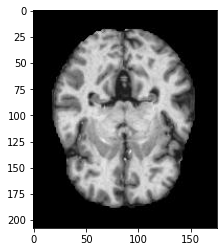

In [8]:
#Preview - load single image 

base_path = "../alzheimer_mri/train"

image_path=f"{base_path}/VeryMildDemented/verymildDem0.jpg"
image_test = load_img(image_path)
print(image_test)
image_random_test = 
image_array_t = img_to_array(image_test)
#print(image_array)
    #X_test = np.array([image_array])
#print(X_test)

plt.imshow(image_test);

In [19]:

#Load all the images in the training set ~5000

X = []
y = []
base_path = "../alzheimer_mri/train"
classes = ["VeryMildDemented", "NonDemented", "ModerateDemented", "MildDemented"]
# class numbering - > 0, 1, 2, 3

for i, target in enumerate(classes):
    files = os.listdir(f"{base_path}/{target}")
    for file in files:
        image_path=f"{base_path}/{target}/{file}"
        #Load image
        image = load_img(image_path, color_mode="grayscale")
        #Convert image to array 
        image_array = img_to_array(image)
        #Append to X
        X.append(image_array)
        # append the numeric target to y
        y.append(i)


#Convert to array 
X = np.array(X)
y = np.array(y)


In [20]:
# shuffle the data
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]

### Preprocessing
#### Check the shapes

In [21]:
X.shape, y.shape

((5121, 208, 176, 1), (5121,))

#### One-Hot-Encode the labels

In [22]:
y_cat = to_categorical(y)

In [23]:
y_cat[0]

array([1., 0., 0., 0.], dtype=float32)

### Define the model

1. Two Convolutional & MaxPooling layers (activation function - relu)

2. Flatten

3. Fully connected layers - 500/700/100 neurons (activation function - elu)

4. Output layer with 4 neurons for classification (activation function - softmax)


#### Clear session 

In [24]:
from tensorflow.keras import backend as K
K.clear_session()

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

#### Create the architecture of the model

In [26]:
model_C = Sequential([
    
    # first convolutional and max pooling layer
    Conv2D(filters=5,
          kernel_size=(6,6),
          strides=(1,1),
          padding="same",
          activation="relu",
          input_shape=(208, 176, 1)),
    MaxPooling2D(pool_size=(2,2),
                strides=(2,2),
                padding="same"),

    # second convolutional and max pooling layer
    Conv2D(filters=15,
          kernel_size=(2,2),
          strides=(1,1),
          padding="same",
          activation="relu",
          input_shape=(51, 43, 5)),
    MaxPooling2D(pool_size=(2,2),
                strides=(2,2),
                padding="same"),
    
    # Flatten
    Flatten(),
    
    # Fully connected
    # layer 1
    Dense(500, activation="elu"),
    BatchNormalization(),
    Dropout(0.2),

    # layer 2
    Dense(700, activation="elu"),
    BatchNormalization(),
    Dropout(0.2),

    # layer 3
    Dense(100, activation="elu"),
    BatchNormalization(),
    Dropout(0.2),

    # Output layer
    Dense(4, activation="softmax")
])

#### Check the model summary

In [27]:
model_C.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 208, 176, 5)       185       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 104, 88, 5)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 104, 88, 15)       315       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 52, 44, 15)        0         
_________________________________________________________________
flatten (Flatten)            (None, 34320)             0         
_________________________________________________________________
dense (Dense)                (None, 500)               17160500  
_________________________________________________________________
batch_normalization (BatchNo (None, 500)               2

### Compile the model
- **Optimizer:** Adam optimizer. Load it from keras
- **Loss:** categorical_crossentropy
- **Metrics:** accuracy

In [28]:
from tensorflow.keras.optimizers import Adam

In [30]:
model_C.compile(optimizer=Adam(), 
              loss="categorical_crossentropy", 
              metrics=["CategoricalAccuracy"])

### Fit the model
- epochs = 15
- batch size = 250

In [31]:
fit_history = model_C.fit(X, y_cat, batch_size=250, epochs=15, validation_split=0.2)

Epoch 1/15
17/17 [==============================] - 57s 3s/step - loss: 1.2280 - categorical_accuracy: 0.5764 - val_loss: 13.4452 - val_categorical_accuracy: 0.1434
Epoch 2/15
17/17 [==============================] - 52s 3s/step - loss: 0.2635 - categorical_accuracy: 0.9175 - val_loss: 1.5573 - val_categorical_accuracy: 0.6820
Epoch 3/15
17/17 [==============================] - 52s 3s/step - loss: 0.0646 - categorical_accuracy: 0.9849 - val_loss: 3.9756 - val_categorical_accuracy: 0.5688
Epoch 4/15
17/17 [==============================] - 51s 3s/step - loss: 0.0307 - categorical_accuracy: 0.9941 - val_loss: 0.3542 - val_categorical_accuracy: 0.8741
Epoch 5/15
17/17 [==============================] - 52s 3s/step - loss: 0.0172 - categorical_accuracy: 0.9978 - val_loss: 0.3347 - val_categorical_accuracy: 0.8888
Epoch 6/15
17/17 [==============================] - 52s 3s/step - loss: 0.0119 - categorical_accuracy: 0.9983 - val_loss: 0.0773 - val_categorical_accuracy: 0.9727
Epoch 7/15
17/1

### Evaluate model
- Plot the accuracy and loss

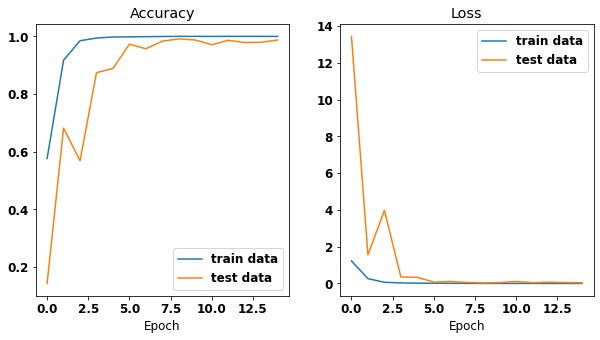

In [36]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.size"] = 12
plt.rcParams["font.weight"] = "bold"
plt.subplot(1, 2, 1)
plt.plot(fit_history.history["categorical_accuracy"], label="train data")
plt.plot(fit_history.history["val_categorical_accuracy"], label="test data")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.legend();
plt.subplot(1, 2, 2)
plt.plot(fit_history.history["loss"], label="train data")
plt.plot(fit_history.history["val_loss"], label="test data")
plt.title("Loss")
plt.xlabel("Epoch")
plt.legend();

Is the model overfitting?

In [34]:
model_fit_history = pd.DataFrame(fit_history.history)
model_fit_history

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
0,1.228038,0.576416,13.445168,0.143415
1,0.263483,0.917480,1.557263,0.681951
2,0.064619,0.984863,3.975553,0.568780
3,0.030747,0.994141,0.354210,0.874146
4,0.017231,0.997803,0.334733,0.888780
5,0.011932,0.998291,0.077302,0.972683
6,0.007673,0.999023,0.109056,0.957073
7,0.005493,0.999512,0.056746,0.983415
8,0.003537,1.000000,0.030858,0.991220
9,0.003214,1.000000,0.048168,0.987317


In [37]:
model_C.get_weights()

[array([[[[-0.08685245,  0.0030469 ,  0.16562778, -0.05850619,
            0.0631375 ]],
 
         [[ 0.09666342, -0.01663119,  0.01361161, -0.06844097,
           -0.00267221]],
 
         [[-0.14365788, -0.03370187,  0.10171445,  0.0538407 ,
           -0.08423577]],
 
         [[-0.1355832 , -0.14390375,  0.01584833, -0.12263615,
            0.15638164]],
 
         [[-0.11010053,  0.05093578, -0.1166815 , -0.01943077,
            0.08051446]],
 
         [[ 0.09582297, -0.06174921,  0.14325535,  0.07748152,
           -0.00041707]]],
 
 
        [[[-0.01815749, -0.11855205, -0.07052932,  0.00127159,
            0.00521494]],
 
         [[ 0.00751174,  0.15961884, -0.08960907, -0.04151855,
           -0.04827464]],
 
         [[ 0.10591761, -0.07812516, -0.03909748, -0.14323467,
           -0.05298268]],
 
         [[-0.03033903, -0.01698789, -0.03038272, -0.11067984,
           -0.06350946]],
 
         [[-0.08990482, -0.15168679, -0.06930365, -0.08124737,
           -0.15702502]]

### Save the model

In [38]:
model_C.save("RSP_weights_C.h5")